In [1]:
pwd

'C:\\Users\\nguye'

In [2]:
cd OneDrive/Desktop/UCSD/Fall_19/ECE143

C:\Users\nguye\OneDrive\Desktop\UCSD\Fall_19\ECE143


In [3]:
#Importing all the required modules used for visualization purposes
#Import functions as well

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib_venn import venn2
#run in iPython shell or pip install matplotlib_venn into OS shell 
from sklearn.decomposition import PCA
import os

In [20]:
#Load data files into variables before entering into following functions

alData=pd.read_csv('C:/Users/nguye/OneDrive/Desktop/UCSD/Fall_19/ECE143/chronic_kidney_disease_full_fixed.csv',error_bad_lines=False)
#https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
#Originally had an error when trying to read the csv file
#The data contains several question marks and answers that are not int/float

alData.columns=['age','blood pressure','specific gravity','albumin','sugar','red blood cells','pus cell','pus cell clumps','bacteria','blood glucose','blood urea','serum creatinine','sodium','potassium','hemoglobin','packed cell volume','white blood cell count','red blood cell count','hypertension','diabetes','coronary artery disease','appetite','edema','anemia','class']            
#Change the column names into string types

diab_data=pd.read_csv('C:/Users/nguye/OneDrive/Desktop/UCSD/Fall_19/ECE143/diabetes.csv')

# Read and Clean Data
remove_nan = diab_data.replace('?', np.NaN)

remove_zero = remove_nan.loc[remove_nan['Glucose'] != 0]
remove_zero = remove_zero.loc[remove_zero['BloodPressure'] != 0]
remove_zero = remove_zero.loc[remove_zero['SkinThickness'] != 0]
remove_zero = remove_zero.loc[remove_zero['Insulin'] != 0]
remove_zero = remove_zero.loc[remove_zero['BMI'] != 0]
remove_zero = remove_zero.loc[remove_zero['DiabetesPedigreeFunction'] != 0]
remove_zero = remove_zero.loc[remove_zero['Age'] != 0]

remove_zero2 = remove_zero.iloc[:, :-1]

data = remove_zero
data = data.sort_values(by='Age')

In [5]:
import create_pie
from create_pie import *

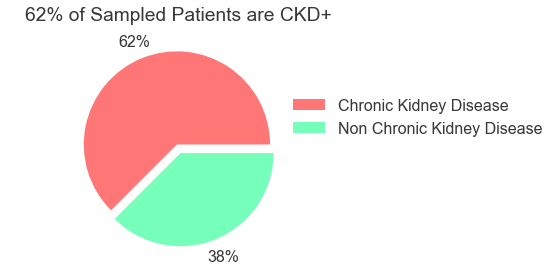

In [6]:
create_pie(alData)

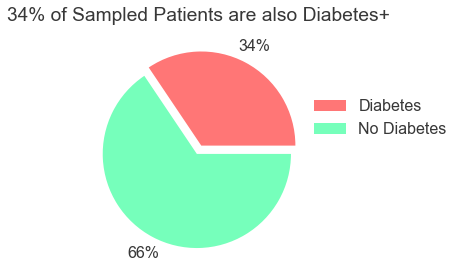

In [7]:
create_pie(alData,classv='nockd')

In [8]:
import create_pie2
from create_pie2 import*

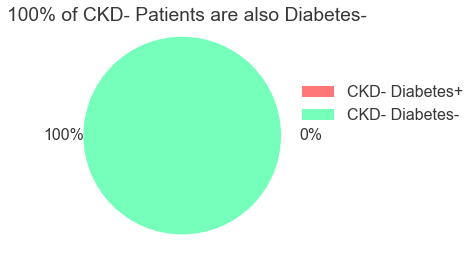

In [9]:
create_pie2(alData)

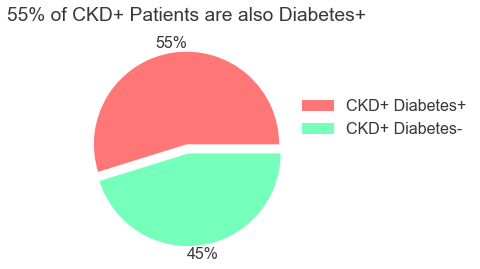

In [10]:
create_pie2(alData,ckd=True)

In [11]:
import create_venn
from create_venn import*

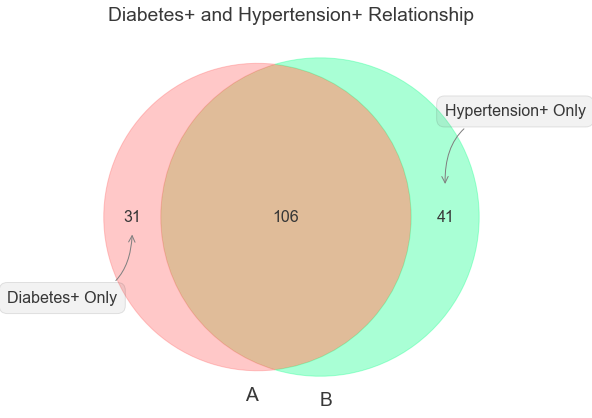

In [12]:
create_venn(alData)

In [13]:
import create_heat
from create_heat import*

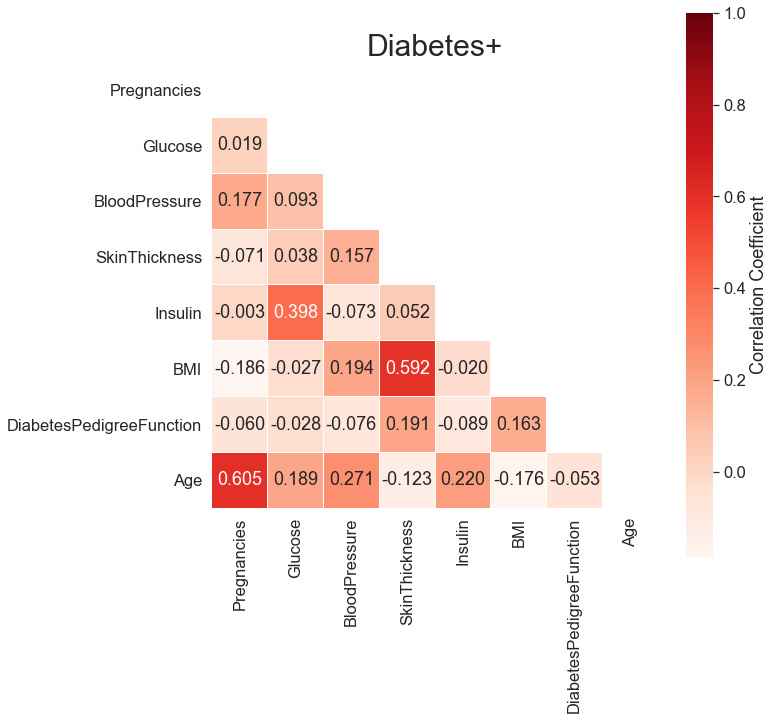

In [14]:
create_heat(diab_data,overlay='d',outcome='pos')

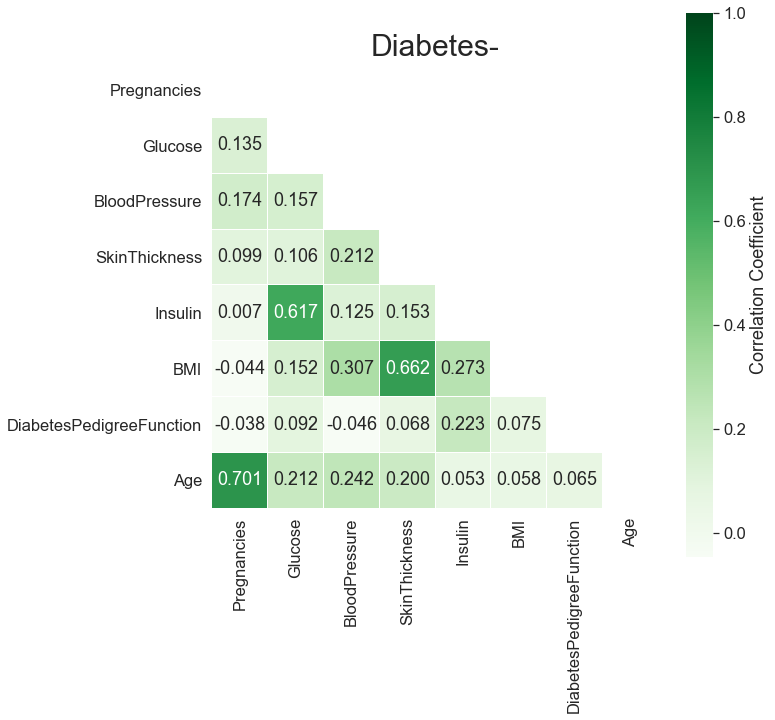

In [15]:
create_heat(diab_data,overlay='d',outcome='neg')

In [16]:
import do_pca
from do_pca import*

original shape:    (203, 14)
transformed shape: (203, 2)
[9.99061430e-01 6.60937993e-04]


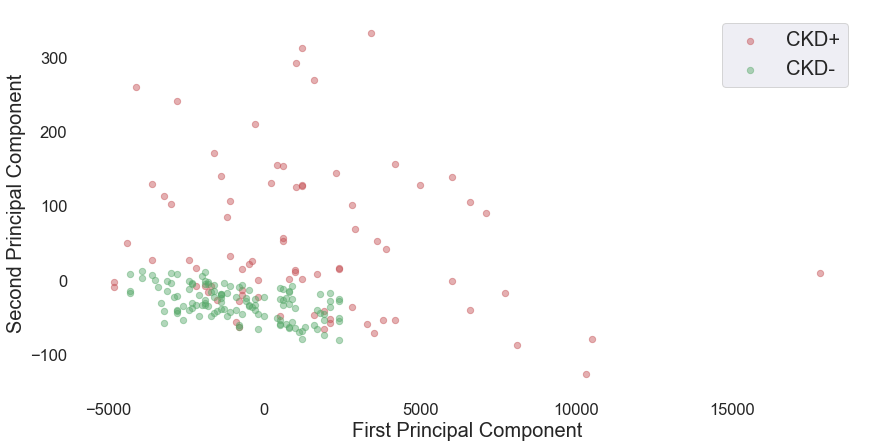

age 0.0009240031079171376
blood pressure 0.0002973163273551553
albumin 0.00012010301912278038
blood glucose 0.00530816069021652
blood urea 0.001429008400508912
sodium -0.00042557742778520863
potassium -0.00010989747749181235
hemoglobin -0.00029227110767685016
packed cell volume -0.0009228067174448298
white blood cell count 0.9999838381890261


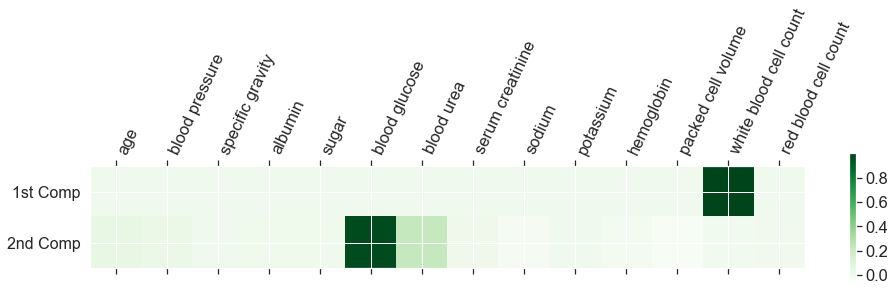

In [17]:
do_pca(alData)

In [26]:
import gen_percentage_diab
from gen_percentage_diab import*

In [27]:
age_diab = gen_percentage_diab(data, object='Age', window=6)

C:\Users\nguye\OneDrive\Desktop\UCSD\Fall_19\ECE143\gen_percentage_diab.py:41: RuntimeWarning: invalid value encountered in longlong_scalars
  freq[str(left_range) + '-' + str(left_range + window-1)] = (m['Outcome'].sum()) / len(m[object])


In [28]:
pregnancies_diab = gen_percentage_diab(data, object='Pregnancies', window=1)

In [29]:
insulin_diab = gen_percentage_diab(data, object='Insulin', window=100)

In [30]:
glucose_diab = gen_percentage_diab(data, object='Glucose', window=30)

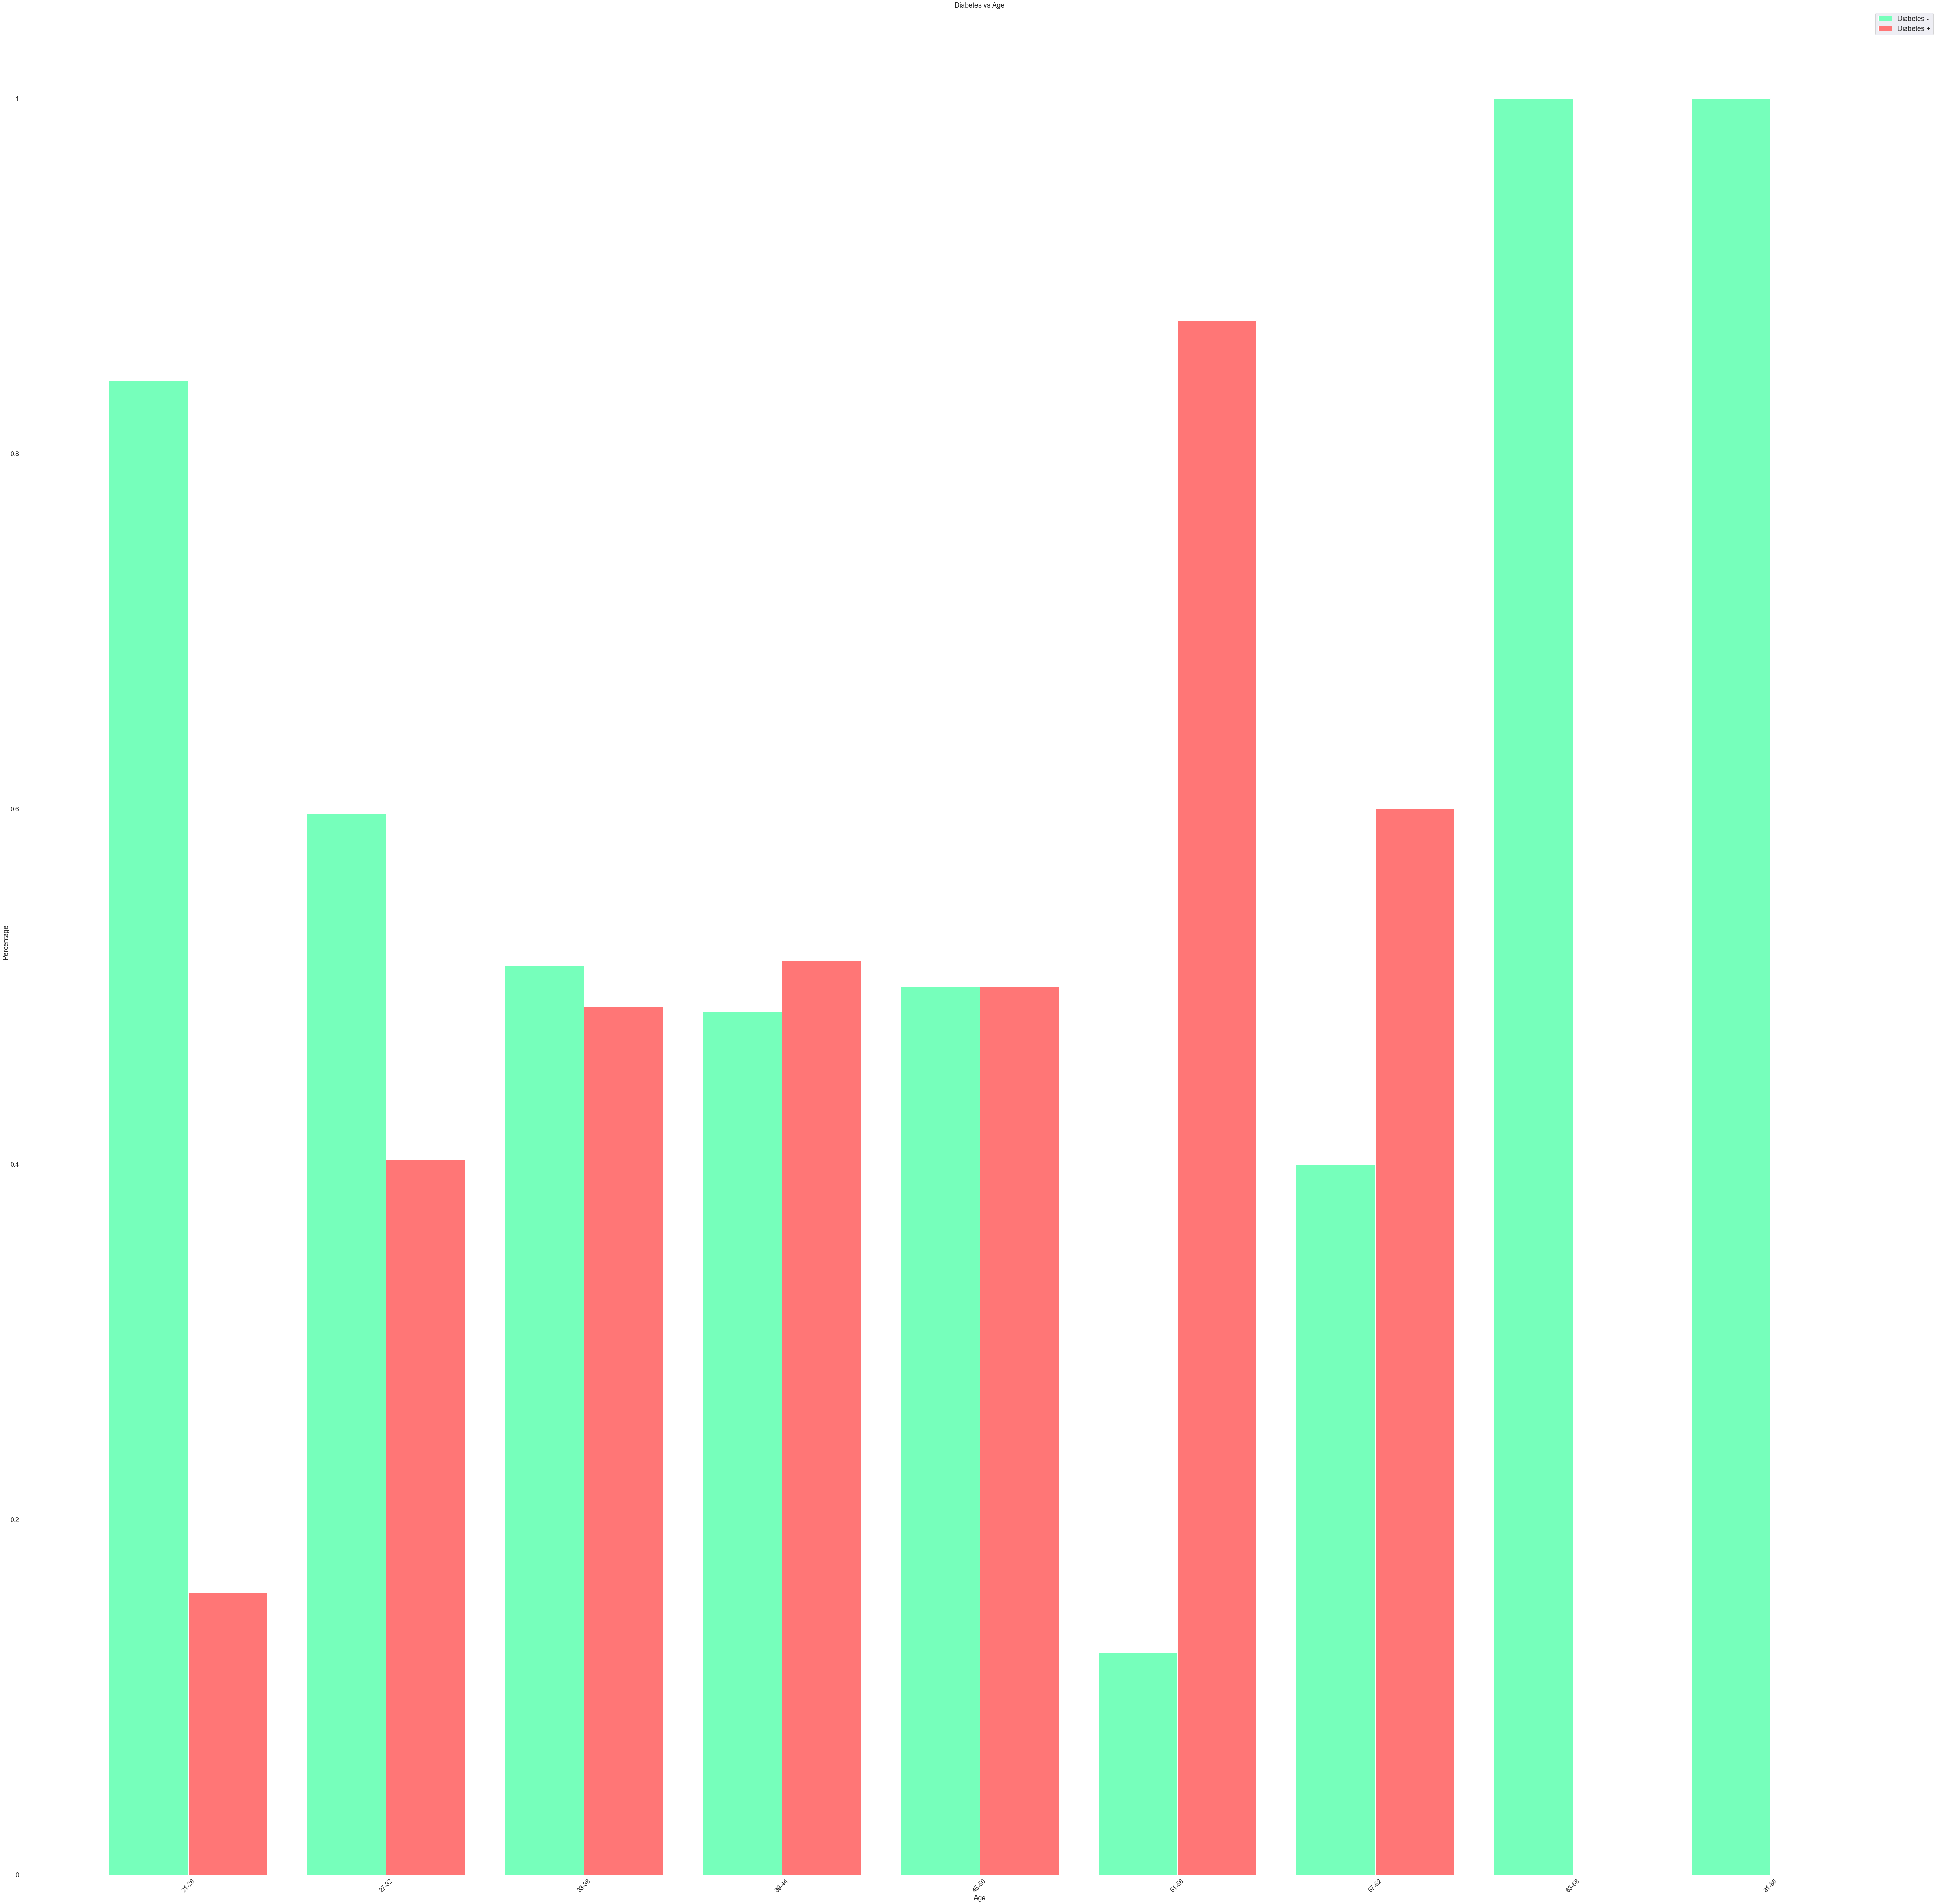

In [31]:
plot_diab_bar(age_diab, title='Diabetes vs Age', object='Age')

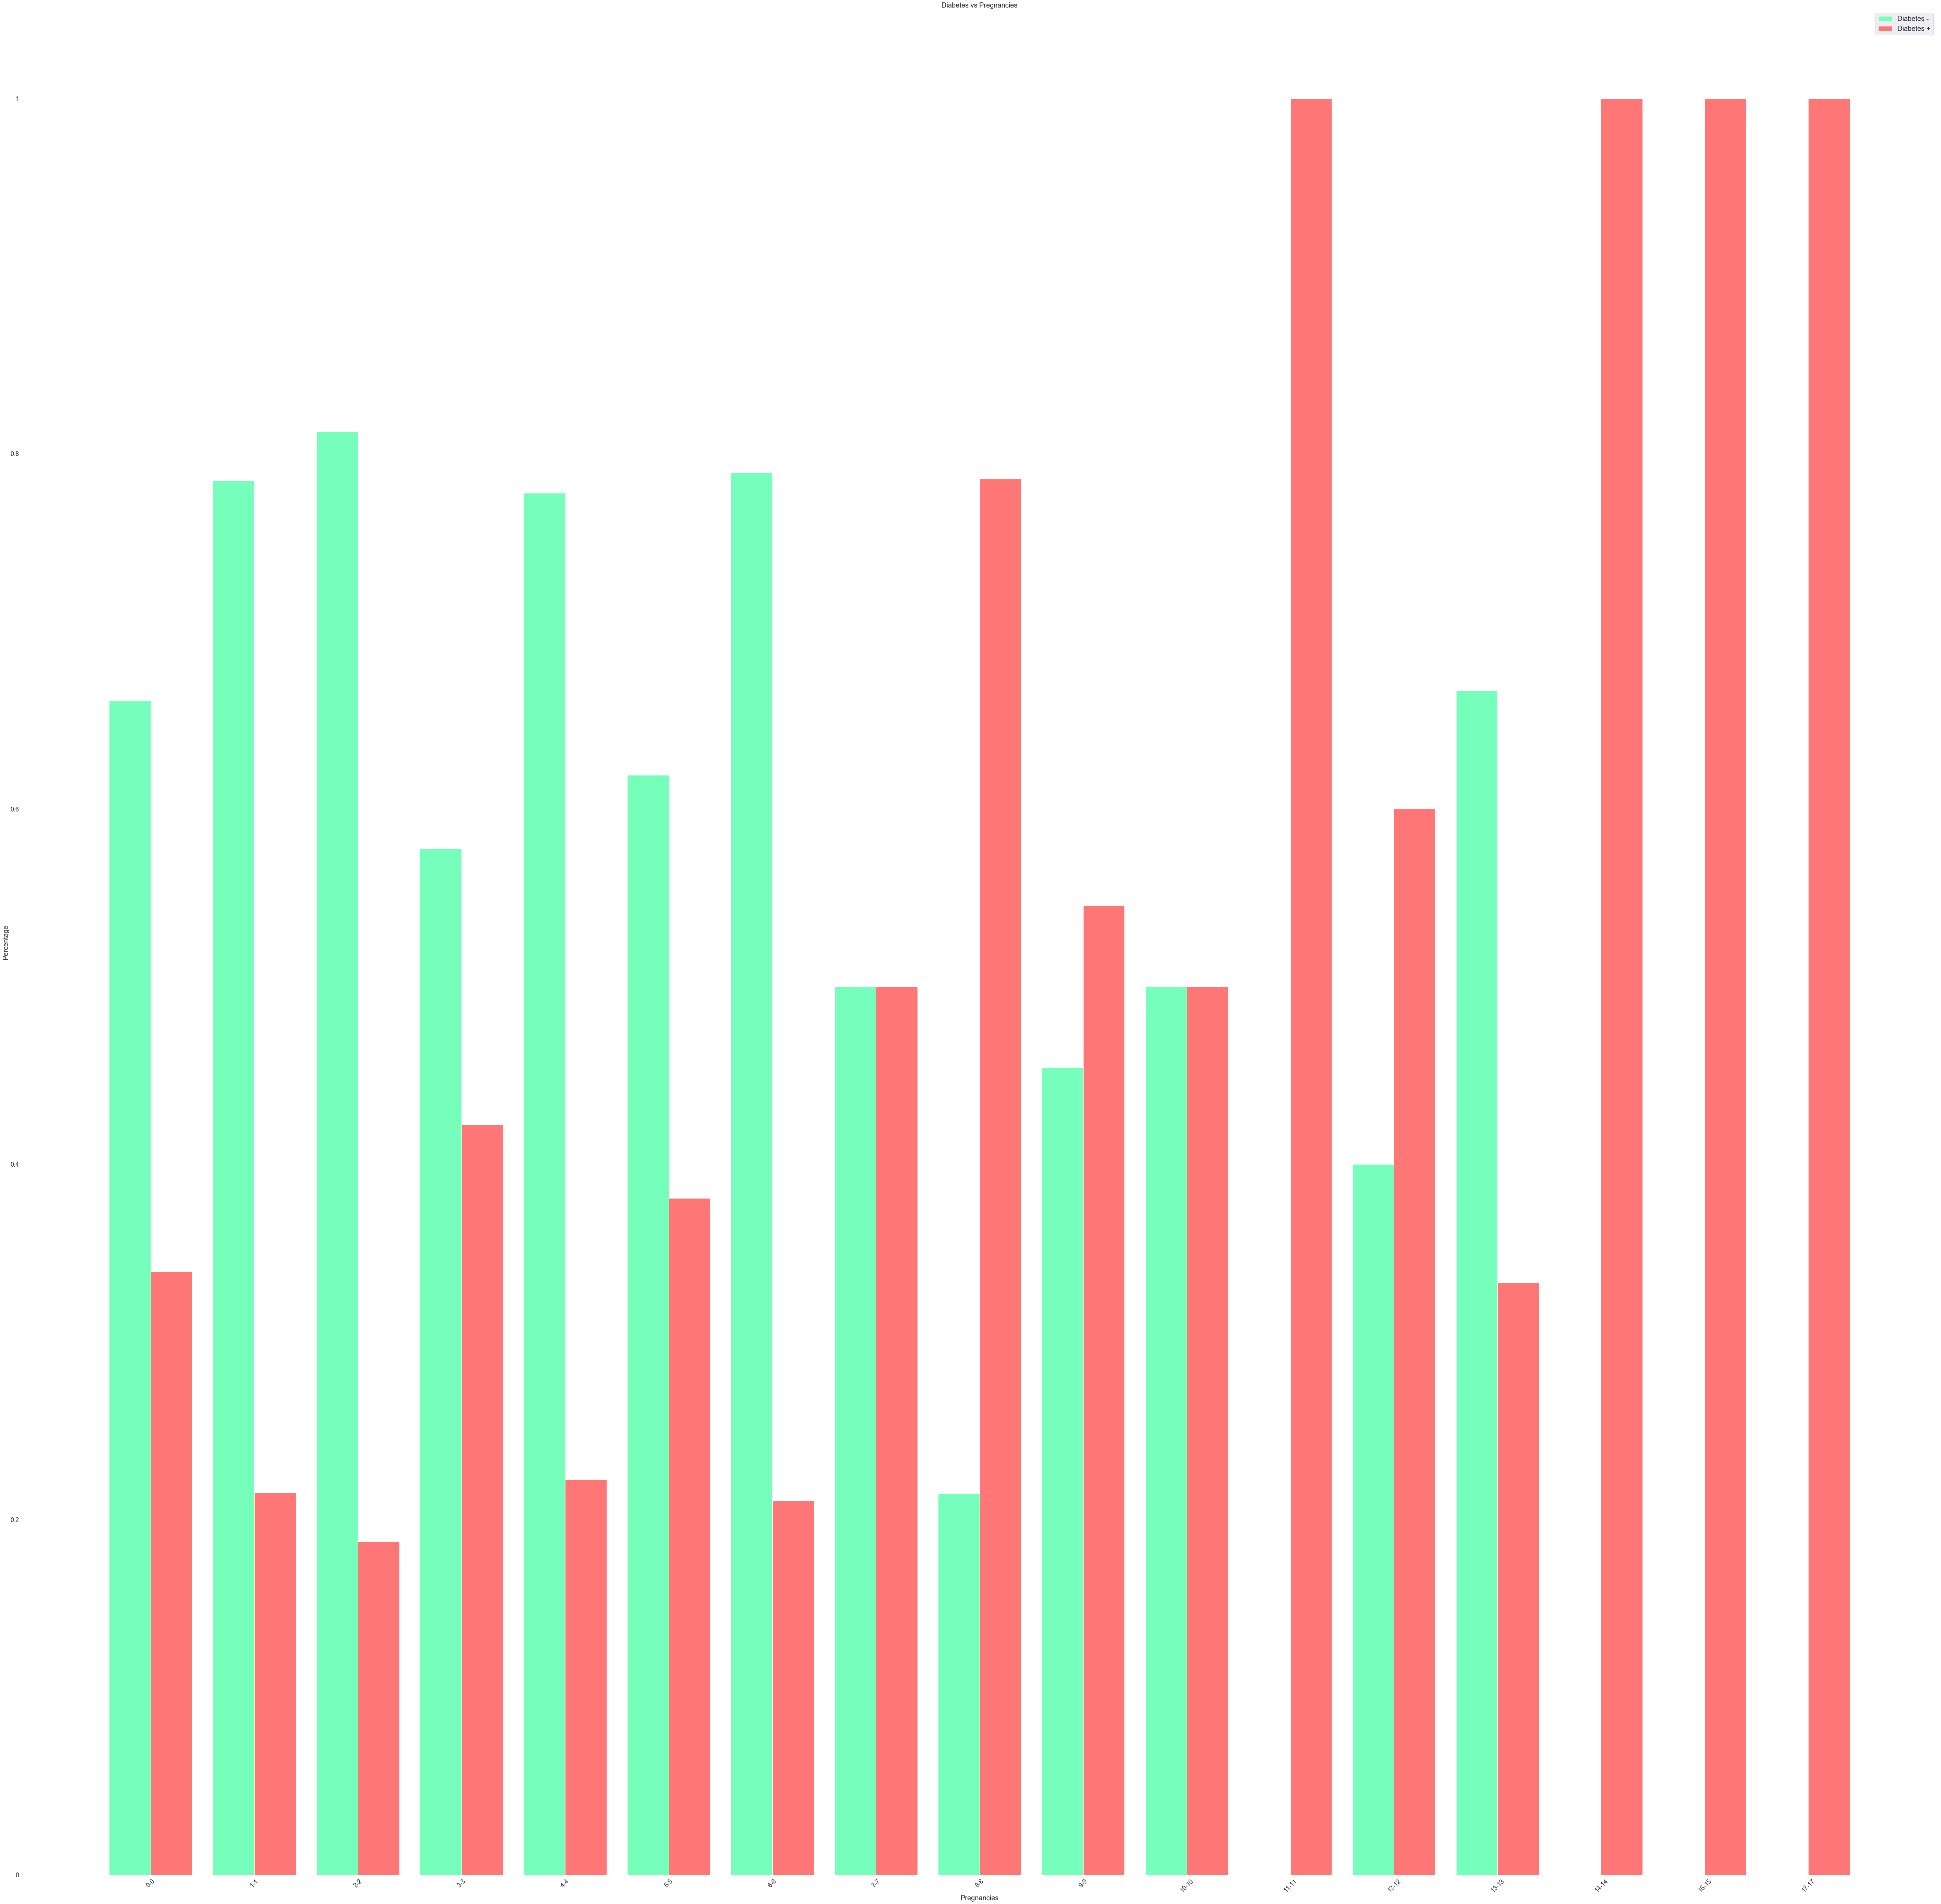

In [32]:
plot_diab_bar(pregnancies_diab, title='Diabetes vs Pregnancies', object='Pregnancies')

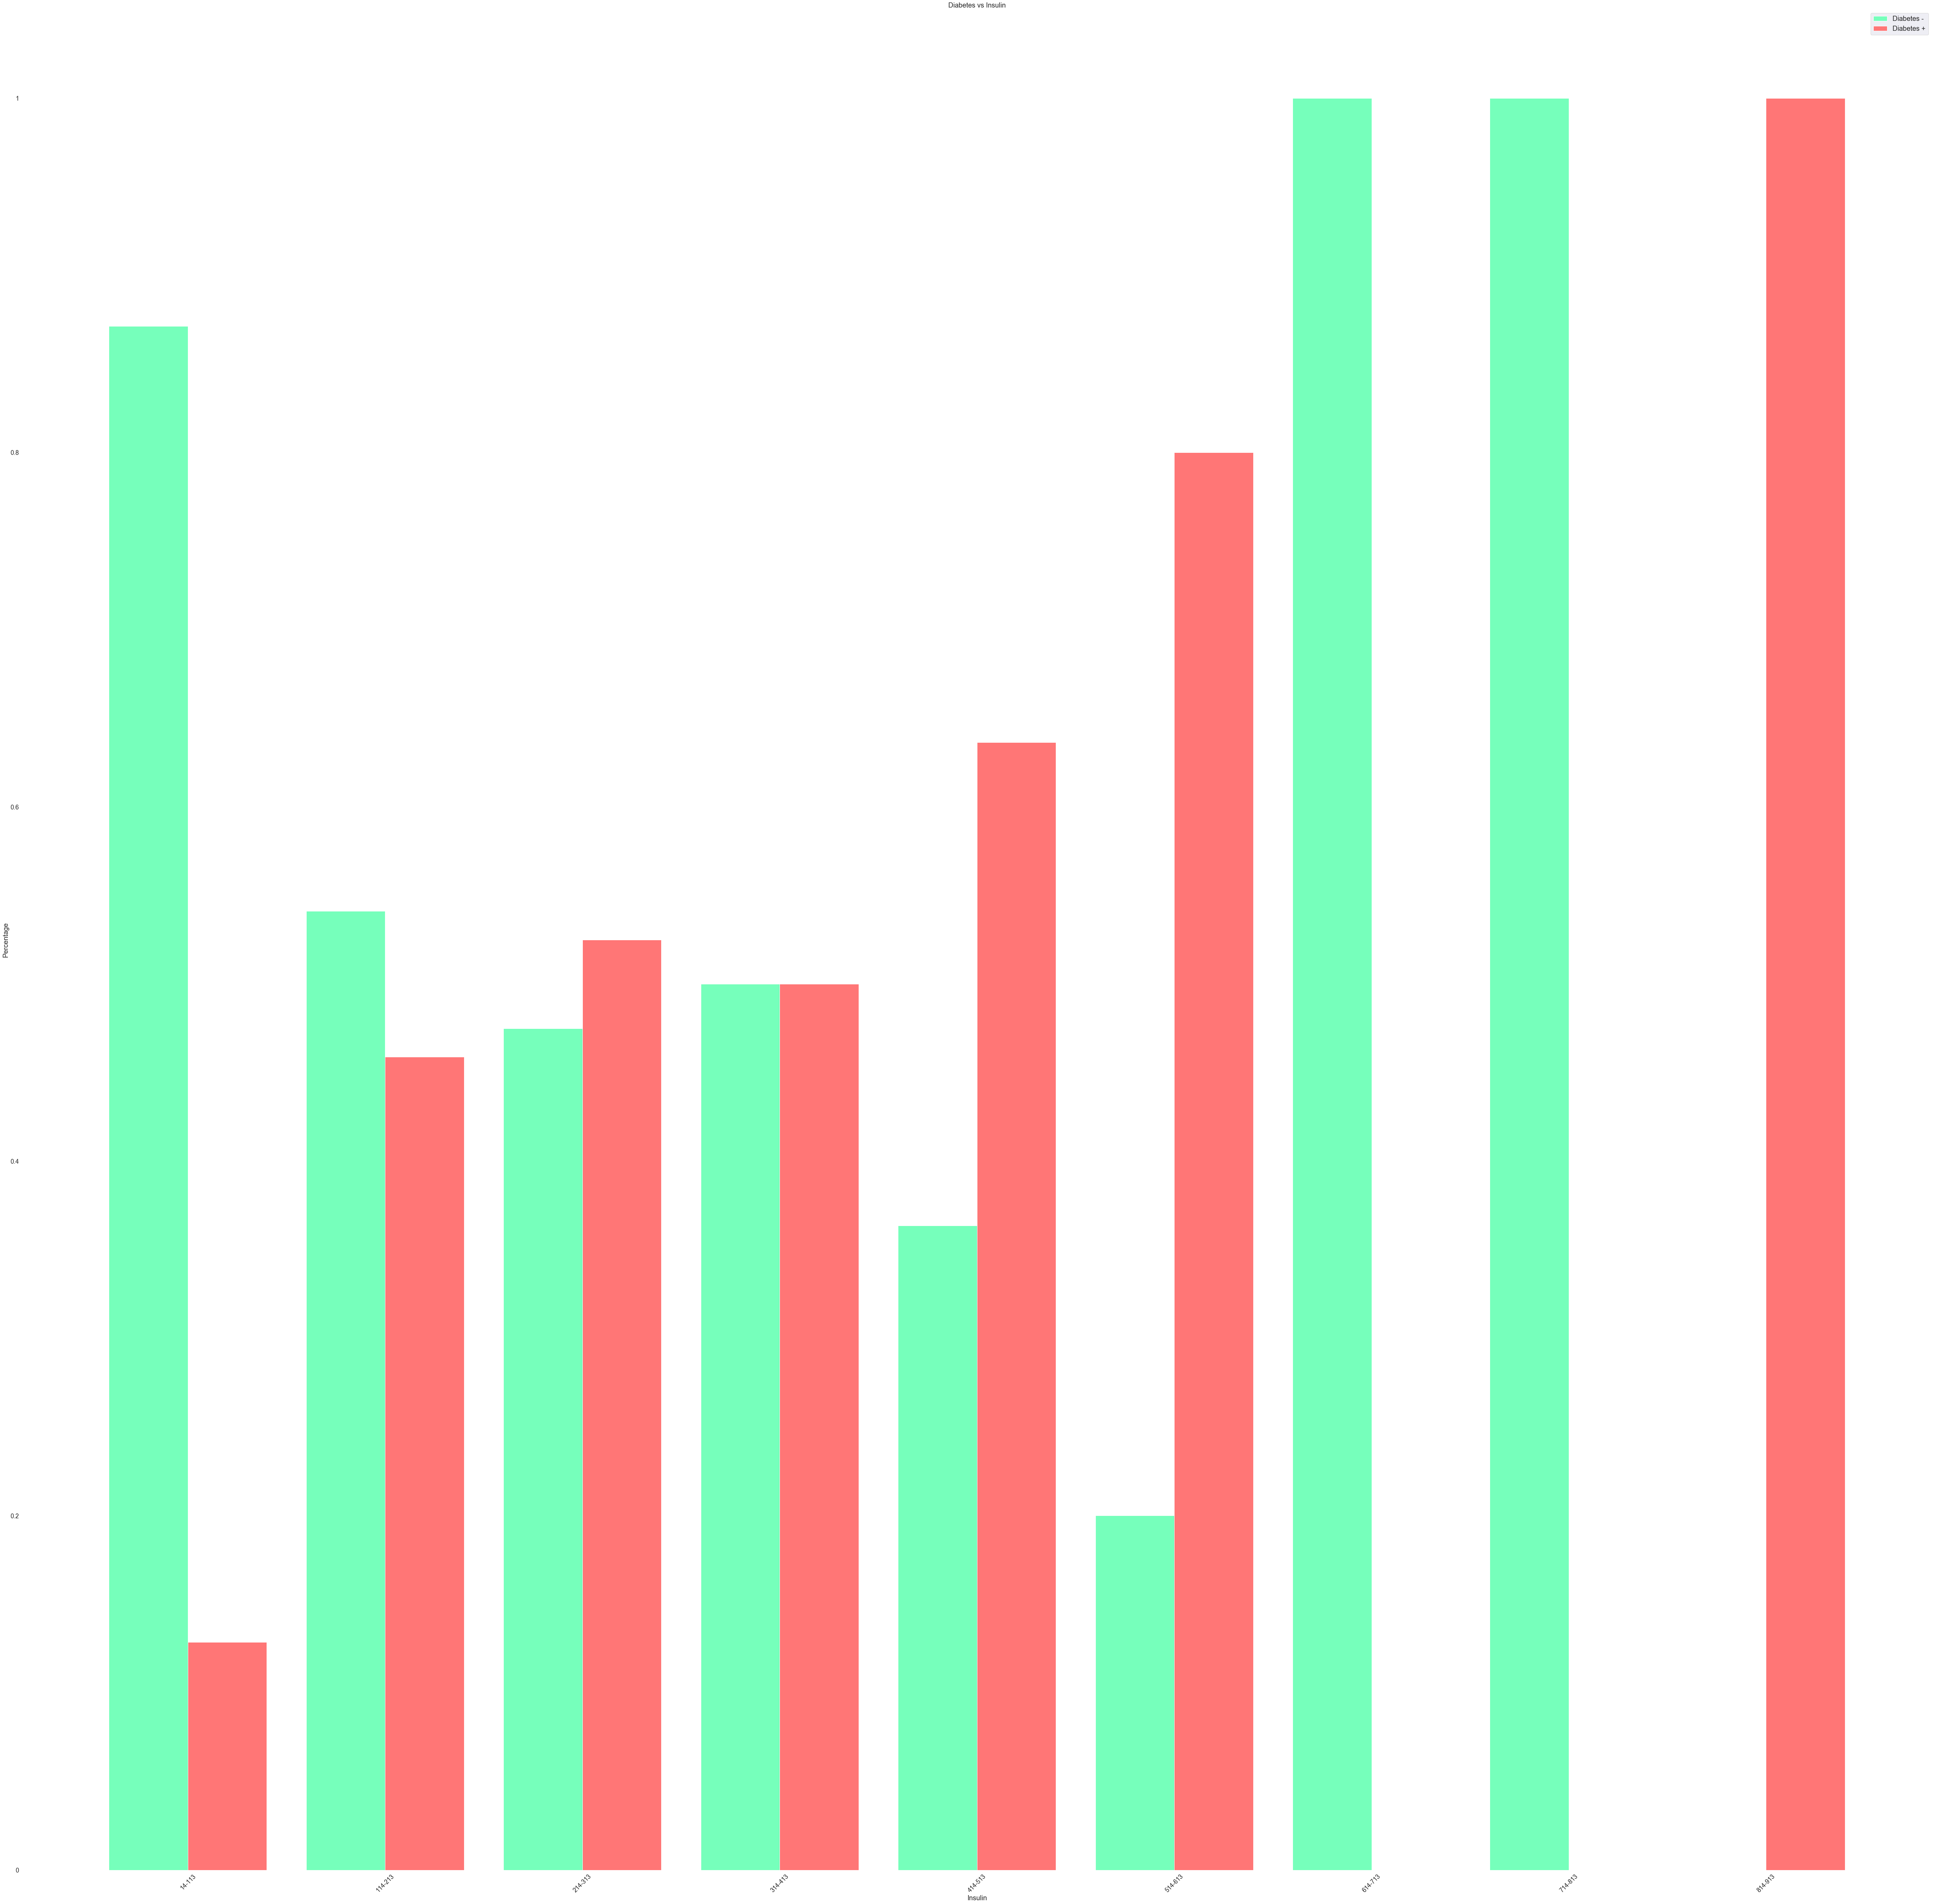

In [33]:
plot_diab_bar(insulin_diab, title='Diabetes vs Insulin', object='Insulin')

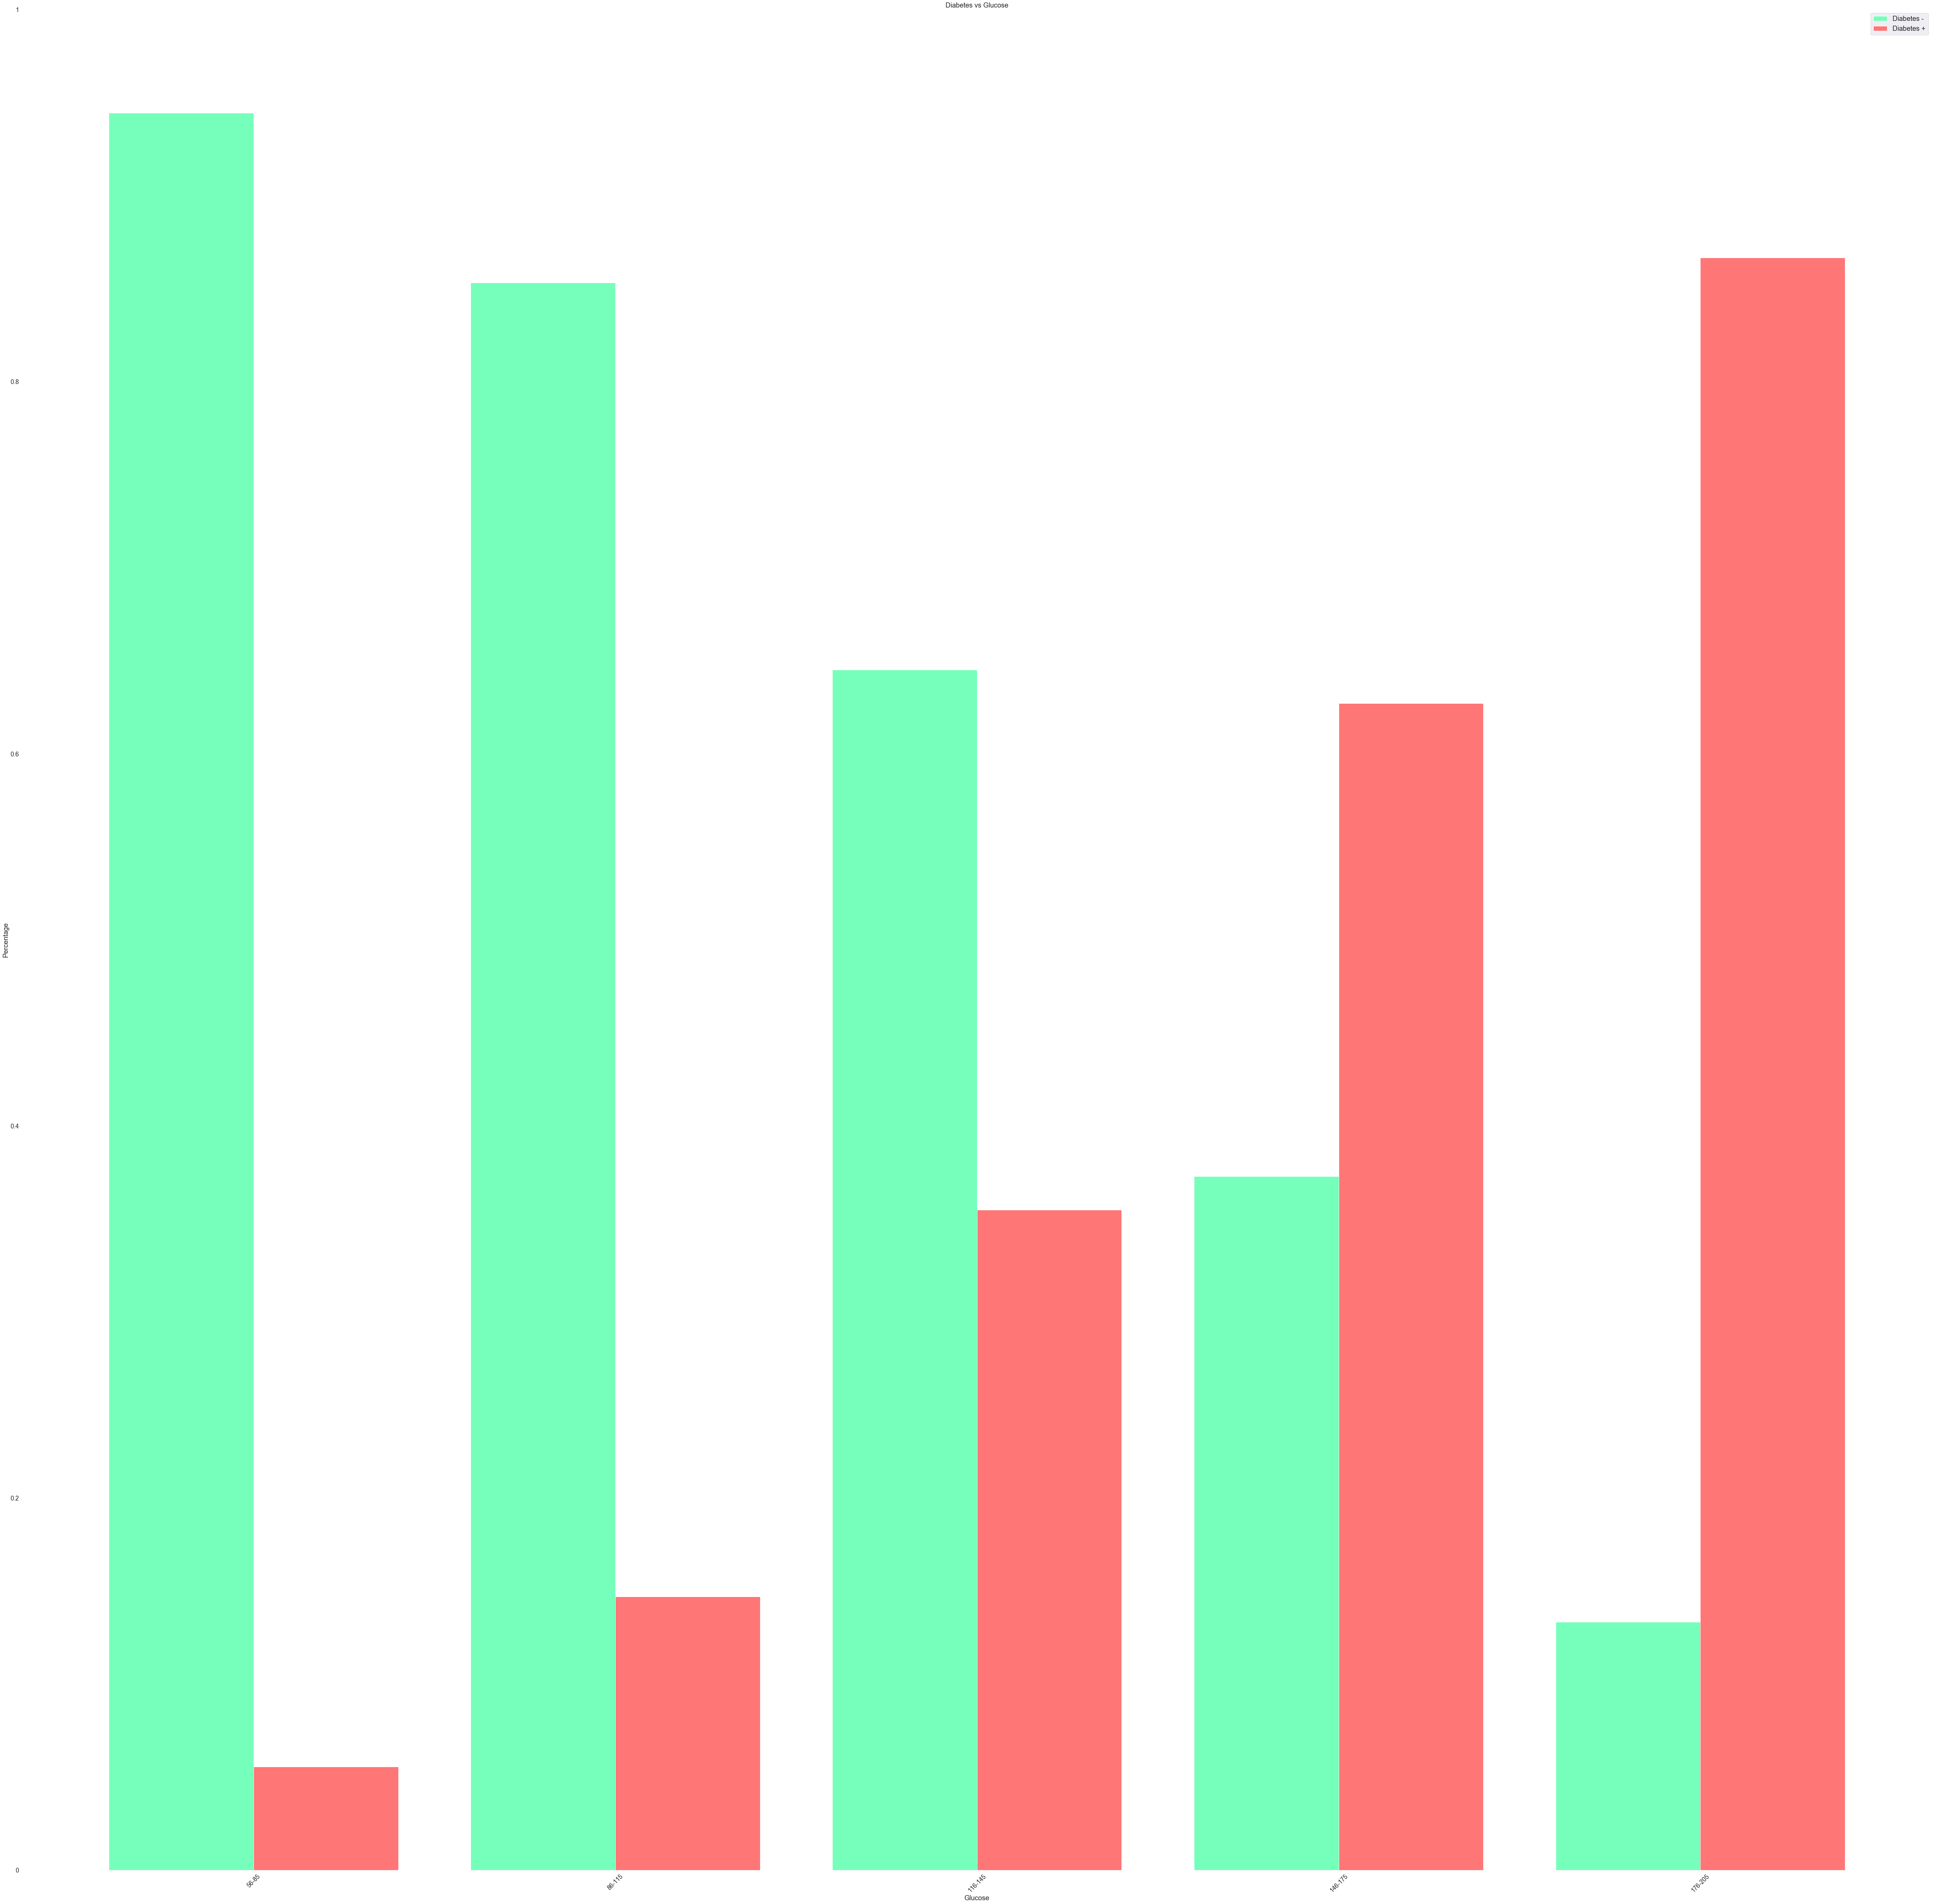

In [34]:
plot_diab_bar(glucose_diab, title='Diabetes vs Glucose', object='Glucose')

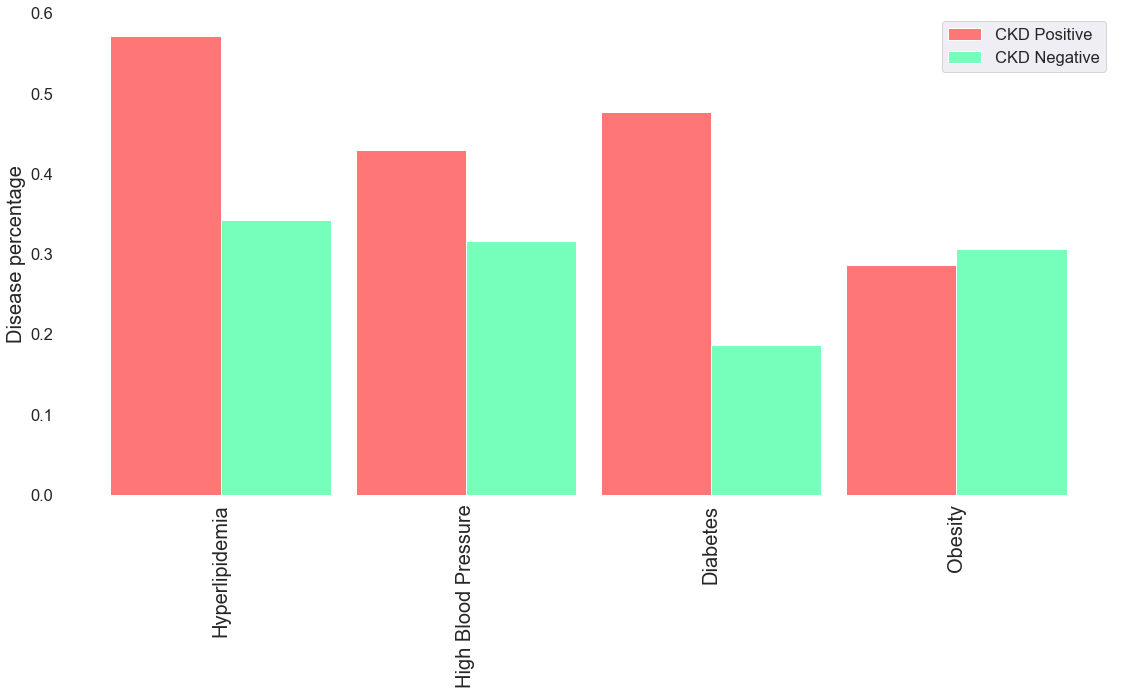

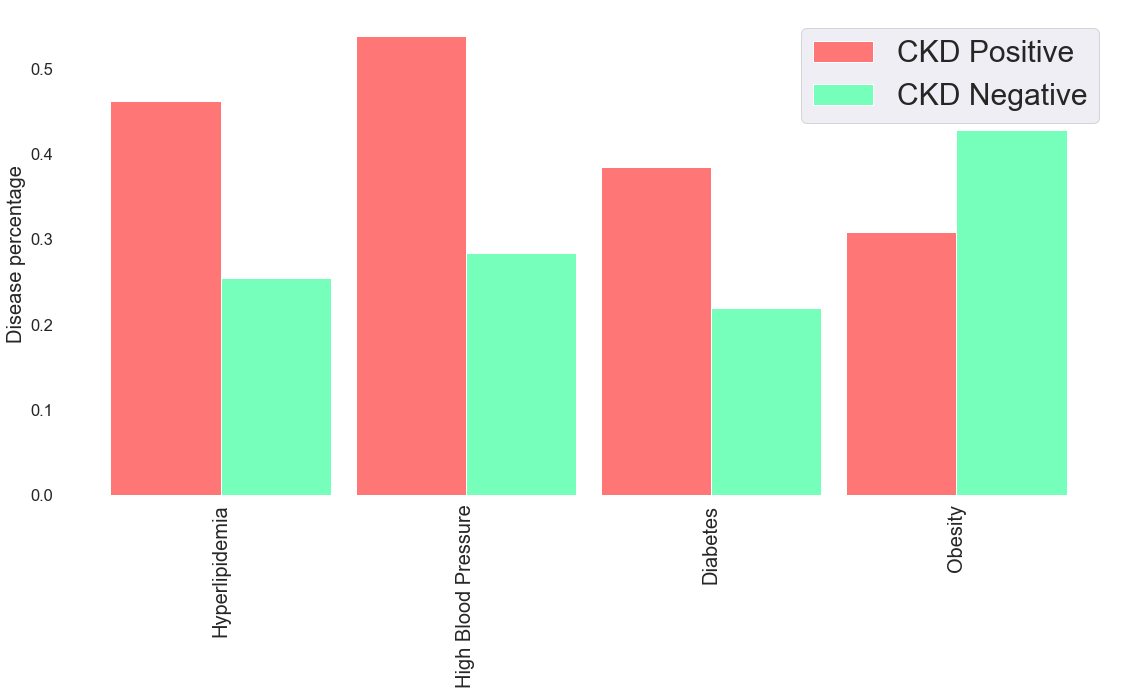

In [51]:
'''
This function reads the 3rd data, and split this data into two group,
people who have CKD, and don't.
Final bar graph that this code is printing is about the realationships between other diseases
which could possibly realted with CKD
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib_venn import venn2
#run in iPython shell or pip install matplotlib_venn into OS shell 
from sklearn.decomposition import PCA
import os
df = pd.read_csv('data3final.csv')

#emove all rows which contains unknown data.
data = df.replace(['UNKNOWN'], [None]).dropna(axis=0) 

#'Kidney Disease'?
Men_w_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'MALE') & (data['Kidney Disease'] == 'YES')]
Men_w_Kdis = Men_w_Kdis.append(Men_w_Kdis.eq('YES').mean(), ignore_index=True) # add new row : YES ratio
Men_w_Kdis = Men_w_Kdis.drop(columns=['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes']) # remove unrealated column

Men_wo_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'MALE') & (data['Kidney Disease'] == 'NO')]
Men_wo_Kdis = Men_wo_Kdis.append(Men_wo_Kdis.eq('YES').mean(), ignore_index=True)
Men_wo_Kdis = Men_wo_Kdis.drop(columns = ['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes'])




Women_w_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'FEMALE') & (data['Kidney Disease'] == 'YES')]
Women_w_Kdis = Women_w_Kdis.append(Women_w_Kdis.eq('YES').mean(), ignore_index=True)
Women_w_Kdis = Women_w_Kdis.drop(columns=['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes'])

Women_wo_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'FEMALE') & (data['Kidney Disease'] == 'NO')]
Women_wo_Kdis = Women_wo_Kdis.append(Women_wo_Kdis.eq('YES').mean(), ignore_index=True)
Women_wo_Kdis = Women_wo_Kdis.drop(columns=['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes'])


#read average YES rate from the dataframe.
Men_data = pd.concat([Men_w_Kdis.tail(1), Men_wo_Kdis.tail(1)], keys = ['with Kidney Disease','w/o Kidney Disease'])
Women_data =  pd.concat([Women_w_Kdis.tail(1), Women_wo_Kdis.tail(1)],keys = ['with Kidney Disease','w/o Kidney Disease'])







####Graphing code######
width = 0.45  # the width of the bars



Men_label = list(Men_data.columns)

x = np.arange(len(Men_label))  # the label locations


fig, ax = plt.subplots(figsize = (16,10))
rects1 = ax.bar(x - width/2, Men_data.iloc[0], width ,label='CKD Positive', color = '#ff7676')
rects2 = ax.bar(x + width/2, Men_data.iloc[1], width , label='CKD Negative',color = '#76ffbb') 



ax.set_ylabel('Disease percentage', fontsize = 20)
#ax.set_title('Diseases percentages of Men')
ax.set_xticks(x)
ax.set_xticklabels(Men_label)
plt.xticks(rotation='vertical', fontsize = 20)
ax.legend()

fig.tight_layout()
plt.box(False)
plt.show()
#plt.savefig('Men Diseases.png')
###########################


Women_label = list(Women_data.columns)

x = np.arange(len(Women_label))  # the label locations
#width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (16,10))
rects1 = ax.bar(x - width/2, Women_data.iloc[0], width, label='CKD Positive', color = '#ff7676')
rects2 = ax.bar(x + width/2, Women_data.iloc[1] ,width, label='CKD Negative', color = '#76ffbb') 

ax.set_ylabel('Disease percentage', fontsize = 20)

#ax.set_title('Diseases percentages of Women')
ax.set_xticks(x)
ax.set_xticklabels(Men_label)
plt.xticks(rotation='vertical', fontsize = 20)
ax.legend()

fig.tight_layout()
plt.legend(fontsize=30)
plt.box(False)
plt.show()